<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><br><br><br><br>
<h1>Low Birth Regression</h1>
<em>DAT-5303 Personal Assignment</em><br><br>
<em>Felipe Dominguez<em><br>
Hult International Business School <br><br><br>


In [1968]:
# Import essential packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# import OLS Regression
from sklearn.linear_model import LinearRegression

# import  Lasso Regression
from sklearn.linear_model import Lasso

# import  ARD Regression
from sklearn.linear_model import ARDRegression

# import KNN Model
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler


In [1969]:
# Import database birthweight_low.xlsx
file = './__datasets/birthweight_low.xlsx'
df_original = pd.read_excel(io = file,
                            sheet_name = 0,
                            header = 0)

# Print head of the dataframe and info
print(df_original.head())
print(df_original.info())

   mage  meduc  monpre  npvis  fage  feduc  omaps  fmaps  cigs  drink  male  \
0    69    NaN       5    2.0    62    NaN      4      7    23      9     1   
1    68   12.0       3   10.0    61   11.0      4      6    25     11     1   
2    71   12.0       3    6.0    46   12.0      2      7    21     12     1   
3    59   16.0       1    8.0    48   16.0      7      8    21     10     0   
4    48   12.0       4    6.0    39   12.0      2      9    17     13     0   

   mwhte  mblck  moth  fwhte  fblck  foth  bwght  
0      0      1     0      0      1     0    697  
1      1      0     0      1      0     0   1290  
2      0      1     0      0      1     0   1490  
3      0      0     1      0      0     1   1720  
4      1      0     0      1      0     0   1956  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1 

In [1970]:
# Let's see how many null values this dataset has
df_original.isnull().sum()

mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

In [1971]:
# Describe original dataset
df_original.describe()

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,196.000000,193.000000,196.000000,193.000000,196.000000,189.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,40.153061,13.911917,2.341837,11.601036,39.290816,13.846561,8.193878,8.964286,10.928571,5.397959,0.551020,0.270408,0.382653,0.346939,0.346939,0.341837,0.311224,3334.086735
std,10.250055,2.055864,1.355136,4.267293,8.982725,2.634217,1.576482,0.651428,6.101282,3.001674,0.498664,0.445308,0.487279,0.477215,0.477215,0.475540,0.464180,646.700904
min,23.000000,8.000000,1.000000,2.000000,23.000000,1.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,697.000000
25%,33.000000,12.000000,2.000000,10.000000,34.750000,12.000000,8.000000,9.000000,6.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2916.250000
50%,39.000000,14.000000,2.000000,12.000000,38.000000,14.000000,9.000000,9.000000,11.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3452.000000
75%,46.000000,16.000000,3.000000,12.000000,43.000000,16.000000,9.000000,9.000000,15.250000,7.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3759.500000
max,71.000000,17.000000,8.000000,35.000000,73.000000,17.000000,10.000000,10.000000,25.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4933.000000


In [1972]:
# Let's flag those NaN values
# loop to detect features with missing values
for column in df_original:
    
    # only those features where there is 1 or more missing values
    if df_original[column].isnull().astype(int).sum()>0:
        df_original['m_'+column] = df_original[column].isnull().astype(int)
    

# summing the missing value flags to check the results of the loop above
df_original.iloc[   :, -3:    ].sum(axis = 0)


m_meduc    3
m_npvis    3
m_feduc    7
dtype: int64

In [1973]:
# Lets find what is the median for each variable and replace null values with it

median_meduc = df_original['meduc'].median()
median_npvis = df_original['npvis'].median()
median_feduc = df_original['feduc'].median()

# Print the median for each feature
print(f"""
The median of Mother education is: {median_meduc}
The median of Number of prenatal visits is: {median_npvis}
The median of Father education is: {median_feduc}
""")


The median of Mother education is: 14.0
The median of Number of prenatal visits is: 12.0
The median of Father education is: 14.0



In [2007]:
# Replace NaN with median

df_original['meduc'].fillna(median_meduc, inplace = True)
df_original['npvis'].fillna(median_npvis, inplace = True)
df_original['feduc'].fillna(median_feduc, inplace = True)

# Print info
df_original.info()

# Print is there is any null
print(f"""
Has this dataframe null value? {df_original.isnull().any().any()}
""")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mage     196 non-null    int64  
 1   meduc    196 non-null    float64
 2   monpre   196 non-null    int64  
 3   npvis    196 non-null    float64
 4   fage     196 non-null    int64  
 5   feduc    196 non-null    float64
 6   omaps    196 non-null    int64  
 7   fmaps    196 non-null    int64  
 8   cigs     196 non-null    int64  
 9   drink    196 non-null    int64  
 10  male     196 non-null    int64  
 11  mwhte    196 non-null    int64  
 12  mblck    196 non-null    int64  
 13  moth     196 non-null    int64  
 14  fwhte    196 non-null    int64  
 15  fblck    196 non-null    int64  
 16  foth     196 non-null    int64  
 17  bwght    196 non-null    int64  
 18  m_meduc  196 non-null    int32  
 19  m_npvis  196 non-null    int32  
 20  m_feduc  196 non-null    int32  
dtypes: float64(3), i

<h2>Features Type</h2>
<h3>Continous Features</h3>
mage <br>
fage<br>
cigs<br>
drink<br>
bwght<br>
feduc<br>
meduc<br>
npvis<br>


<h3>Interval/Counts Features</h3>
monpre<br>


<h3>Category Features</h3> 
mwhte<br>
mblck<br>
moth<br>
fwhte<br>
fblck<br>
foth<br>
male<br>


In [1975]:
# Copy of the original dataset to not replace it
df_regression = df_original.copy()

# It is needed to drop one of the race of father and mother, as we have 3 options and we need k-1 dummies
# Looking at the histograms, I decided to remove other races of father and mother to be consistent

df_regression.drop(columns = ['foth', 'moth'], inplace = True, axis = 1)

#Let's remove flag values

df_regression.drop(columns =['m_meduc', 'm_npvis', 'm_feduc'], inplace = True, axis = 1)

# Finally, lets remove omaps and fmaps columns as this features are measure after birth. Therefore
# It can't be used to predict

df_regression.drop(columns=['omaps', 'fmaps'], inplace = True, axis = 1)

# Print info dataframe
df_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   196 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   196 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   196 non-null    float64
 6   cigs    196 non-null    int64  
 7   drink   196 non-null    int64  
 8   male    196 non-null    int64  
 9   mwhte   196 non-null    int64  
 10  mblck   196 non-null    int64  
 11  fwhte   196 non-null    int64  
 12  fblck   196 non-null    int64  
 13  bwght   196 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 21.6 KB


array([[<AxesSubplot:title={'center':'mage'}>,
        <AxesSubplot:title={'center':'meduc'}>,
        <AxesSubplot:title={'center':'monpre'}>,
        <AxesSubplot:title={'center':'npvis'}>],
       [<AxesSubplot:title={'center':'fage'}>,
        <AxesSubplot:title={'center':'feduc'}>,
        <AxesSubplot:title={'center':'cigs'}>,
        <AxesSubplot:title={'center':'drink'}>],
       [<AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'mwhte'}>,
        <AxesSubplot:title={'center':'mblck'}>,
        <AxesSubplot:title={'center':'fwhte'}>],
       [<AxesSubplot:title={'center':'fblck'}>,
        <AxesSubplot:title={'center':'bwght'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

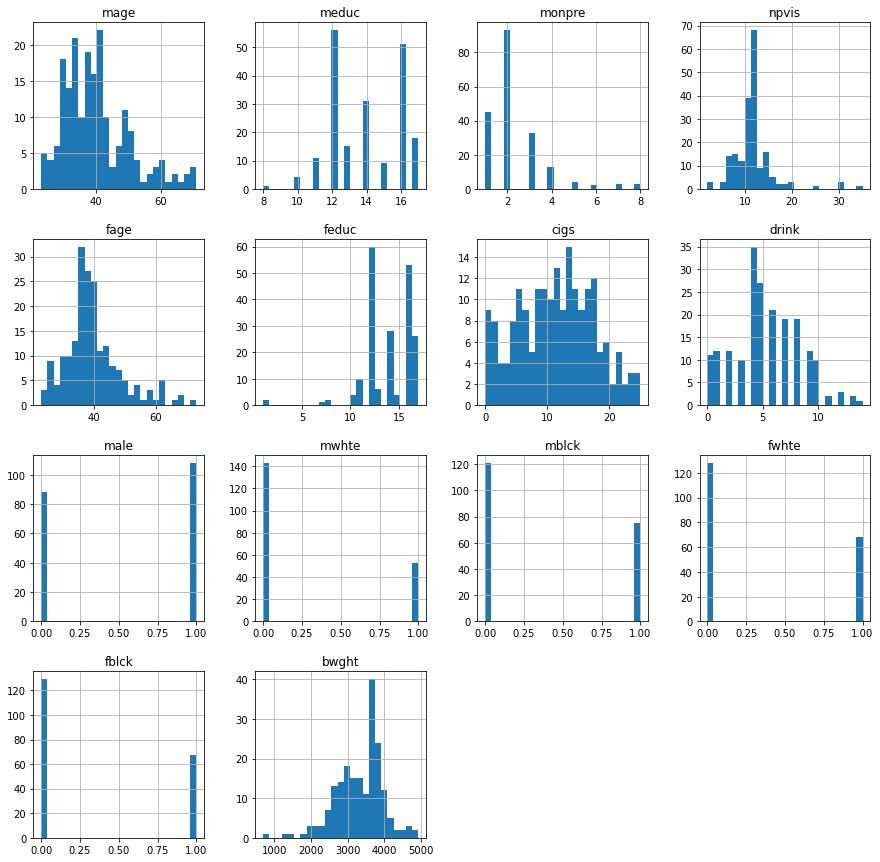

In [1976]:
# Let's draw histogram for each continous value
df_regression.hist(bins = 25, figsize = (15,15))

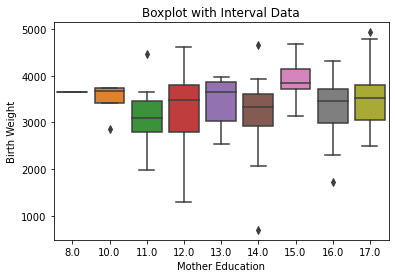


Count of Mother Education

----------
Mother years of education
----------
8.0      1
10.0     4
11.0    11
12.0    56
13.0    15
14.0    31
15.0     9
16.0    51
17.0    18
Name: meduc, dtype: int64




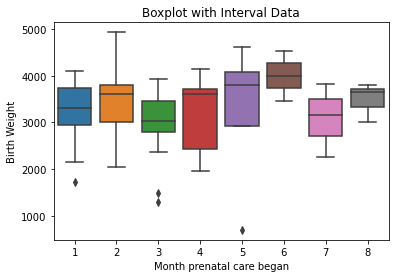


Count of Month prenatal care began

----------
Month prenatal care began
----------
1    45
2    93
3    33
4    13
5     4
6     2
7     3
8     3
Name: monpre, dtype: int64




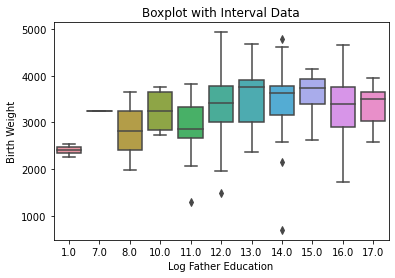


Count of Log Father Education

----------
Log Father Education
----------
1.0      2
7.0      1
8.0      2
10.0     4
11.0    10
12.0    60
13.0     6
14.0    28
15.0     4
16.0    53
17.0    26
Name: feduc, dtype: int64




In [2008]:
# Analysis on interval variables: meduc, monpre, feduc
# I will analyze the distribution of each variable by looking at boxplot and find what is the "median" trend of each interval

#Function create a boxplot
def box_plot(data, x, y, x_label, y_label):
    # developing a boxplot
    sns.boxplot(x    = x,
                y    = y,
                data = data)
    # titles and axis labels
    plt.title(label   = 'Boxplot with Interval Data')
    plt.xlabel(xlabel = x_label)
    plt.ylabel(ylabel = y_label)
    # displaying the plot
    plt.show()

#slicing interval variable
df_interval = df_original[['monpre', 'bwght', 'feduc', 'meduc']]

# plotting boxplot for interval variables
# 1. meduc
box_plot(df_interval, 'meduc', 'bwght', 'Mother Education', 'Birth Weight')

# printing value counts for Mother Education
print(f"""
Count of Mother Education
==================

----------
Mother years of education
----------
{df_interval['meduc'].value_counts(normalize = False).sort_index()}

""")

# 2. monpre
box_plot(df_interval, 'monpre', 'bwght', 'Month prenatal care began', 'Birth Weight')

# printing value counts for Month prenatal care began
print(f"""
Count of Month prenatal care began
==================

----------
Month prenatal care began
----------
{df_interval['monpre'].value_counts(normalize = False).sort_index()}

""")


# 3. log_meduc
box_plot(df_interval, 'feduc', 'bwght', 'Log Father Education', 'Birth Weight')

# printing value counts for Father Education
print(f"""
Count of Log Father Education
==================

----------
Log Father Education
----------
{df_regression['feduc'].value_counts(normalize = False).sort_index()}

""")



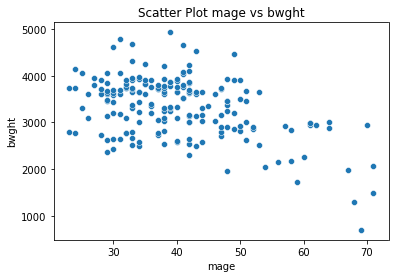

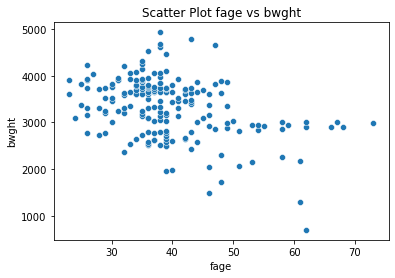

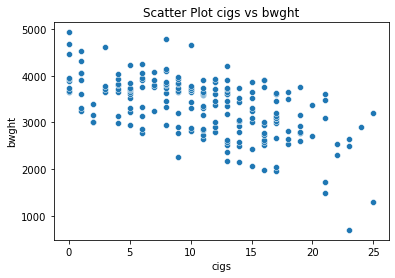

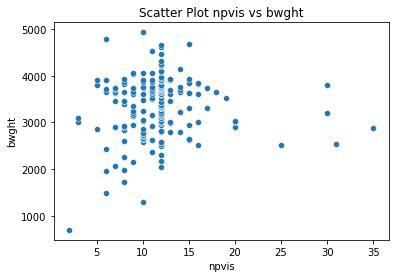

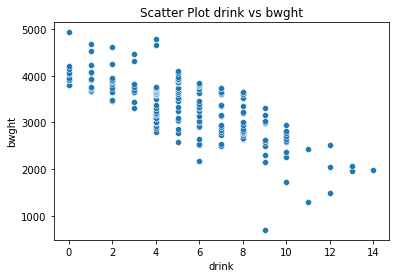

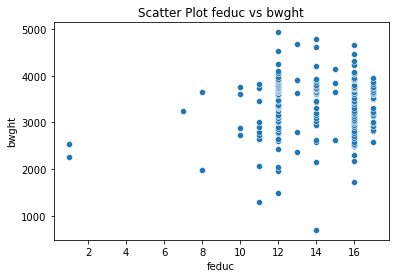

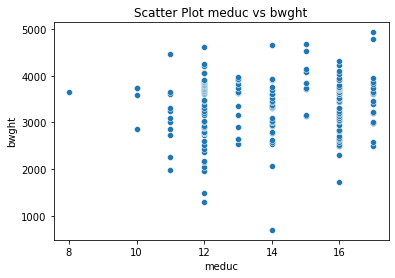

<Figure size 432x288 with 0 Axes>

In [2009]:
# Analysis on continous variables: mage, fage, bwght, cigs, npvis, drinks

# Let's create an scatter plot for each continous variable
df_continous = df_regression[['mage', 'fage', 'cigs', 'npvis', 'drink', 'feduc', 'meduc']]

for column in df_continous:
    sns.scatterplot(data = df_original, y = 'bwght', x = column)
    plt.title(f"""Scatter Plot {column} vs bwght""")
    plt.show()
    plt.clf()
    




In [2010]:
# Feature Engineering 
# In this section features will be created. Many options were tried before, here you will see those who had 
# a significant influence in the regression model 

#First, copy last dataframe to not replace it
df_feature_engineering = df_regression.copy()

# First let's classify month pre natal care began before month 2 and after month 3
bins = [0, 2, 9]
bins_label = ['monpre_1_2', 'monpre_3+']
df_feature_engineering['bin_monpre'] = pd.cut(x=df_feature_engineering['monpre'], bins = bins, labels = bins_label)
print()

print(f"""
Count of group Month Pre Natal Began
==================

----------
Month Pre-Natal Began
----------
{df_feature_engineering['bin_monpre'].value_counts().sort_index()}

""")

# Let's group Mother education above or below 12 years
bins = [0, 12, 25]
bins_label = ['meduc_below_12', 'meduc_above_13']
df_feature_engineering['bin_meduc'] = pd.cut(x=df_feature_engineering['meduc'], bins = bins, labels = bins_label)
print()

print(f"""
Count of group Mother education
==================

----------
Group Mother Education
----------
{df_feature_engineering['bin_meduc'].value_counts().sort_index()}

""")

# Father Education above or below 12 years
bins = [0, 11, 25]
bins_label = ['feduc_below_12', 'feduc_above_13']
df_feature_engineering['bin_feduc'] = pd.cut(x=df_feature_engineering['feduc'], bins = bins, labels = bins_label)
print()

print(f"""
Count of group Father education
==================

----------
Group Father Education
----------
{df_feature_engineering['bin_feduc'].value_counts().sort_index()}

""")

# Let's group drinks by those 0-1 p/w, 2-5 p/w, 6-50 p/w 
bins = [0, 1, 5, 50]
bins_label = ['drink_0_1', 'drink_2_5', 'drink_6_50']
df_feature_engineering['bin_drink'] = pd.cut(x=df_feature_engineering['drink'], bins = bins, labels = bins_label, include_lowest = True)
print()

print(f"""
Count of group Drinks per week
==================

----------
Drinks per week
----------
{df_feature_engineering['bin_drink'].value_counts().sort_index()}

""")

# Let's group Cigarettes by 0-2 p/w, 3-10 p/w, 11-15 p/w, and more than 15 p/w
bins = [0, 2, 10, 15, 50]
bins_label = ['cigs_0_2', 'cigs_3_10','cigs_10_15', 'cigs_15_50']
df_feature_engineering['bin_cigs'] = pd.cut(x=df_feature_engineering['cigs'], bins = bins, labels = bins_label, include_lowest = True)


print(f"""
Count of group Cigarettes per day
==================

----------
Cigarettes per week
----------
{df_feature_engineering['bin_cigs'].value_counts().sort_index()}

""")


# Let's group mother age above below 35, between 35 and 50, and older than 50
bins = [0, 35, 50, 90]
bins_label = ['mage_0_35', 'mage_35_50', 'mage_50_90']
df_feature_engineering['bin_mage'] = pd.cut(x=df_feature_engineering['mage'], bins = bins, labels = bins_label)
print()

print(f"""
Count of group Mother age
==================

----------
Group Mother Age
----------
{df_feature_engineering['bin_mage'].value_counts().sort_index()}

""")

# Let's group father age  below 35, between 35-45 and older than 45
bins = [0, 35, 45, 90]
bins_label = ['fage_0_35', 'fage_35_45', 'fage_45_90']
df_feature_engineering['bin_fage'] = pd.cut(x=df_feature_engineering['fage'], bins = bins, labels = bins_label)
print()

print(f"""
Count of group Father age
==================

----------
Group Father Age
----------
{df_feature_engineering['bin_fage'].value_counts().sort_index()}

""")


# Let's group number of doctor visit: 0-7 visits, 8-9 visits, 10-25 visits
bins = [0, 7, 9, 25]
bins_label = ['npvis_below_7', 'npvis_between_7_9', 'npvis_9+']
df_feature_engineering['bin_npvis'] = pd.cut(x=df_feature_engineering['npvis'], bins = bins, labels = bins_label)
print()

print(f"""
Count of group Doctor visits
==================

----------
Group Doctor visits
----------
{df_feature_engineering['bin_npvis'].value_counts().sort_index()}

""")



# Let's see the influence of father drink and age
df_feature_engineering['drink_fage'] = df_feature_engineering['drink'] * df_feature_engineering['fage']

# let's see the influence between how earlier a black mother start her pre natal care. Black people in the US 
# has less access to health than white

df_feature_engineering['mblck_monpre'] = df_feature_engineering['mblck']*df_feature_engineering['monpre']

# Let's see the influence of both cigarettes and alcohol
df_feature_engineering['cigs_drinks'] = df_feature_engineering['cigs'] * df_feature_engineering['drink']

df_feature_engineering['risk'] = df_feature_engineering['cigs_drinks'] / df_feature_engineering['npvis']

#Let's see the influence of both parents being black
df_feature_engineering['mblck_fblck'] = df_feature_engineering['mblck'] * df_feature_engineering['fblck']

# Let's see the influence of black mother and white father
df_feature_engineering['fwhte_mblck'] = df_feature_engineering['mblck'] * df_feature_engineering['fwhte']

# let's see the relation between the age of the mother and when she started the pre natal are
df_feature_engineering['monpre_mage'] = df_feature_engineering['mage'] * df_feature_engineering['monpre']

# Let's transform monpre into logarithm function
df_feature_engineering['log_monpre'] = np.log(df_feature_engineering['monpre'])

# Let's transform monpre into logarithm function
df_feature_engineering['log_cigs'] = np.log(df_feature_engineering['cigs']+0.0001)






Count of group Month Pre Natal Began

----------
Month Pre-Natal Began
----------
monpre_1_2    138
monpre_3+      58
Name: bin_monpre, dtype: int64




Count of group Mother education

----------
Group Mother Education
----------
meduc_below_12     72
meduc_above_13    124
Name: bin_meduc, dtype: int64




Count of group Father education

----------
Group Father Education
----------
feduc_below_12     19
feduc_above_13    177
Name: bin_feduc, dtype: int64




Count of group Drinks per week

----------
Drinks per week
----------
drink_0_1     23
drink_2_5     84
drink_6_50    89
Name: bin_drink, dtype: int64



Count of group Cigarettes per day

----------
Cigarettes per week
----------
cigs_0_2      21
cigs_3_10     69
cigs_10_15    57
cigs_15_50    49
Name: bin_cigs, dtype: int64




Count of group Mother age

----------
Group Mother Age
----------
mage_0_35     73
mage_35_50    96
mage_50_90    27
Name: bin_mage, dtype: int64




Count of group Father age

----------
Group Father 

In [2016]:
#Get dummies
df_regression_dummies = df_feature_engineering.copy()
df_regression_dummies = pd.get_dummies(df_feature_engineering, columns = ['bin_npvis', 'bin_feduc', 'bin_fage', 'bin_mage', 'bin_cigs','bin_monpre', 'bin_meduc', 'bin_drink'], prefix = 'is')

In [2017]:
# Create log of birthweight
df_regression_dummies['log_bwght'] = np.log(df_regression['bwght'])
log_bwght = df_regression_dummies['log_bwght']

# Drop dummies redundant

df_regression_dummies.drop(columns = ['is_npvis_9+', 'is_fage_35_45','is_feduc_above_13', 'is_mage_35_50', 'is_cigs_10_15', 'is_monpre_1_2', 'is_meduc_above_13', 'is_drink_2_5'], inplace= True)

In [2019]:
# Feature Engineering 2
# let's see if the group of mother who start pre natal care later and drink affect birth weight
df_regression_dummies['monpre3+_drink6+'] = df_regression_dummies['is_monpre_3+'] * df_regression_dummies['is_drink_6_50']
df_regression_dummies['monpre3+_drink6+'].value_counts()

# Healthier and young mother
df_regression_dummies['mage_drink01'] = df_regression_dummies['is_mage_0_35'] * df_regression_dummies['is_drink_0_1']
df_regression_dummies['mage_drink01'].value_counts()

df_regression_dummies['mage_cigs01'] = df_regression_dummies['is_mage_0_35'] * df_regression_dummies['is_cigs_0_2']
df_regression_dummies['mage_cigs01'].value_counts()

0    188
1      8
Name: mage_cigs01, dtype: int64

In [2020]:
# Let's analyze log of birthweight
df_regression_dummies['log_bwght'] = np.log(df_regression['bwght'])
log_bwght = df_regression_dummies['log_bwght']

In [2021]:
# Analysis of corr. between bwgth others 

# creating a (Pearson) correlation matrix
df_corr = df_regression_dummies.corr().round(2)


# printing (Pearson) correlations with SalePrice
print(f"""
------------------------------------------------------
Correlation bet. birth weight and rest of variables
------------------------------------------------------
""")
print(df_corr.loc['bwght'].sort_values(ascending = True))


------------------------------------------------------
Correlation bet. birth weight and rest of variables
------------------------------------------------------

cigs_drinks            -0.80
drink_fage             -0.76
drink                  -0.74
risk                   -0.70
is_drink_6_50          -0.59
cigs                   -0.57
is_mage_50_90          -0.48
mage                   -0.46
is_cigs_15_50          -0.44
monpre3+_drink6+       -0.42
fage                   -0.40
is_fage_45_90          -0.39
log_cigs               -0.37
monpre_mage            -0.25
is_feduc_below_12      -0.22
is_monpre_3+           -0.18
mwhte                  -0.11
is_npvis_below_7       -0.11
is_meduc_below_12      -0.09
fwhte_mblck            -0.07
is_npvis_between_7_9   -0.07
log_monpre             -0.06
monpre                 -0.05
fwhte                  -0.04
npvis                   0.06
meduc                   0.09
mblck_monpre            0.10
male                    0.11
mblck_fblck             

In [2023]:
# Analysis of corr. between  log_bwght & others.

# creating a (Pearson) correlation matrix
df_corr = df_regression_dummies.corr().round(2)


# printing (Pearson) correlations with SalePrice
print(f"""
------------------------------------------------------
Correlation bet. log_birth weight and rest of variables
------------------------------------------------------
""")
print(df_corr.loc['log_bwght'].sort_values(ascending = True))


------------------------------------------------------
Correlation bet. log_birth weight and rest of variables
------------------------------------------------------

risk                   -0.82
cigs_drinks            -0.79
drink_fage             -0.74
drink                  -0.70
cigs                   -0.55
is_drink_6_50          -0.54
is_mage_50_90          -0.51
mage                   -0.50
monpre3+_drink6+       -0.43
is_cigs_15_50          -0.43
fage                   -0.41
is_fage_45_90          -0.40
log_cigs               -0.32
monpre_mage            -0.31
is_feduc_below_12      -0.21
is_monpre_3+           -0.20
is_npvis_below_7       -0.17
mwhte                  -0.11
monpre                 -0.09
log_monpre             -0.09
is_meduc_below_12      -0.09
fwhte_mblck            -0.06
is_npvis_between_7_9   -0.06
fwhte                  -0.04
mblck_monpre            0.04
male                    0.08
mblck_fblck             0.08
meduc                   0.09
fblck               

In [2024]:
# Funtion to copy on future regression model arguments
a = ''
for column in df_regression_dummies:
    if 'bwght' not in column:
        a = "'" + column + "'" + ', ' + a
print(a)



'mage_cigs01', 'mage_drink01', 'monpre3+_drink6+', 'is_drink_6_50', 'is_drink_0_1', 'is_meduc_below_12', 'is_monpre_3+', 'is_cigs_15_50', 'is_cigs_3_10', 'is_cigs_0_2', 'is_mage_50_90', 'is_mage_0_35', 'is_fage_45_90', 'is_fage_0_35', 'is_feduc_below_12', 'is_npvis_between_7_9', 'is_npvis_below_7', 'log_cigs', 'log_monpre', 'monpre_mage', 'fwhte_mblck', 'mblck_fblck', 'risk', 'cigs_drinks', 'mblck_monpre', 'drink_fage', 'fblck', 'fwhte', 'mblck', 'mwhte', 'male', 'drink', 'cigs', 'feduc', 'fage', 'npvis', 'monpre', 'meduc', 'mage', 


In [2029]:
# features for OLS stats model
x_features = df_regression_dummies.loc[:, ('is_drink_6_50', 'monpre_mage', \
                                           'mblck_fblck', 'fwhte_mblck', 'mblck_monpre',  \
                                           'is_cigs_15_50', 'mblck', 'cigs_drinks' ,      \
                                           'drink_fage' , 'is_cigs_3_10','is_cigs_0_2')]

y_target = df_regression_dummies['log_bwght']

In [2031]:
# Funtion to copy on stats model arguments
a = ''
for column in x_features:
    if 'bwght' not in column:
        a = column + ' + ' + a
print(a)

is_cigs_0_2 + is_cigs_3_10 + drink_fage + cigs_drinks + mblck + is_cigs_15_50 + mblck_monpre + fwhte_mblck + mblck_fblck + monpre_mage + is_drink_6_50 + 


In [2038]:
# Statmodels Linear Regression model
# Initiate 
lr_model = smf.ols(formula = """log_bwght ~  is_cigs_0_2 + is_cigs_3_10 + drink_fage + \
                                             cigs_drinks + mblck + is_cigs_15_50 + mblck_monpre + fwhte_mblck + mblck_fblck +    \
                                             monpre_mage + is_drink_6_50""",
                        data = df_regression_dummies)


# telling Python to FIT the data to the blueprint
results = lr_model.fit()


# printing a summary of the results
print(results.summary())




                            OLS Regression Results                            
Dep. Variable:              log_bwght   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     39.57
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           1.01e-42
Time:                        20:46:56   Log-Likelihood:                 127.47
No. Observations:                 196   AIC:                            -230.9
Df Residuals:                     184   BIC:                            -191.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.3546      0.028    298.241

In [2039]:
# Defining target to try (Log and normal)
y_target = df_regression_dummies['bwght']
log_y_target = df_regression_dummies['log_bwght']

In [2042]:
# Features for OLS Model  -> x_features_OLS
x_features_OLS = df_regression_dummies.loc[:, ('is_drink_6_50', 'monpre_mage', 'mblck_fblck', 'fwhte_mblck', 'mblck_monpre', 'is_cigs_15_50', 'mblck', 'cigs_drinks' ,'drink_fage' , 'is_cigs_3_10','is_cigs_0_2')]

x_features_full = df_regression_dummies.drop(columns = ['bwght', 'log_bwght'])

y_target = df_regression_dummies['bwght']

# Split train and dataset OLS
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(x_features_OLS, y_target, test_size=0.25, random_state=219)

# Features for Lasso Model  -> x_features_Lasso
x_features_Lasso = df_regression_dummies.loc[:, ('mage_drink01', 'mblck', 'is_npvis_between_7_9', 'monpre3+_drink6+', 'log_monpre','log_cigs', 'mblck_monpre', 'cigs_drinks' ,'drink_fage' , 'is_cigs_3_10')]
# Split train and dataset Lasso
x_train_Lasso, x_test_Lasso, y_train_Lasso, y_test_Lasso = train_test_split(x_features_Lasso, y_target, test_size=0.25, random_state=219)



In [2045]:
###################    OLS Model          ######################################
# INSTANTIATING a linear regression model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square


lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score = lr.score(x_test_OLS, y_test_OLS).round(4)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

#The smaller the GAP the more stable the model

OLS Training Score : 0.7187
OLS Testing Score  : 0.7238
OLS Train-Test Gap : 0.0051


In [2046]:
###################    Lasso Model        ######################################

# INSTANTIATING a Lasso regression model object
model_lasso = Lasso(alpha= 0.001, normalize = True)


# FITTING to the training data
model_lasso_fit = model_lasso.fit(x_train_Lasso, y_train_Lasso)


# PREDICTING on new data
model_lasso_pred = model_lasso_fit.predict(x_test_Lasso)


# SCORING the results
print('Lasso Training Score :', model_lasso_fit.score(x_train_Lasso, y_train_Lasso).round(4))  # using R-square
print('Lasso Testing Score  :',  model_lasso_fit.score(x_test_Lasso, y_test_Lasso).round(4)) # using R-square


model_lasso_fit_train_score = model_lasso_fit.score(x_train_Lasso, y_train_Lasso).round(4)
model_lasso_fit_test_score = model_lasso_fit.score(x_test_Lasso, y_test_Lasso).round(4)

# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(model_lasso_fit_train_score - model_lasso_fit_test_score).round(4))
model_lasso_test_gap = abs(model_lasso_fit_train_score - model_lasso_fit_test_score).round(4)

#The smaller the GAP the more stable the model


Lasso Training Score : 0.7036
Lasso Testing Score  : 0.7519
Lasso Train-Test Gap : 0.0483


D:\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [2047]:
# Taking a look to the Lasso Coefficients
aux = 0
for feature in model_lasso_fit.feature_names_in_:
    print(f"""The {feature} feature has a coefficient of: {model_lasso_fit.coef_[aux].round(6)}""")
    aux+=1
    
    

The mage_drink01 feature has a coefficient of: -76.090074
The mblck feature has a coefficient of: 57.029085
The is_npvis_between_7_9 feature has a coefficient of: 31.009585
The monpre3+_drink6+ feature has a coefficient of: -62.108616
The log_monpre feature has a coefficient of: 35.869746
The log_cigs feature has a coefficient of: -21.034912
The mblck_monpre feature has a coefficient of: -29.062358
The cigs_drinks feature has a coefficient of: -4.459049
The drink_fage feature has a coefficient of: -1.830602
The is_cigs_3_10 feature has a coefficient of: 149.134592


In [2048]:
########### KNN Model #########################
# 1. Standardize model
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with housing_data
scaler.fit(x_features_Lasso)


# TRANSFORMING our data after fit
x_scaled = scaler.transform(x_features_Lasso)


# converting scaled data into a DataFrame
x_scaled_df = pd.DataFrame(x_scaled)


# checking the results
x_scaled_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9
count,196.00,196.00,196.0,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,0.00,-0.00,0.0,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.23,-0.79,-0.4,-0.43,-1.43,-4.37,-0.62,-1.12,-1.51,-0.74
25%,-0.23,-0.79,-0.4,-0.43,-0.05,0.03,-0.62,-0.78,-0.69,-0.74
50%,-0.23,-0.79,-0.4,-0.43,-0.05,0.27,-0.62,-0.30,-0.17,-0.74
75%,-0.23,1.27,-0.4,-0.43,0.76,0.40,0.64,0.35,0.49,1.36
max,4.31,1.27,2.5,2.31,2.71,0.60,4.45,3.58,3.09,1.36


In [2052]:
# Split train and dataset
x_train, x_test, y_train, y_test = train_test_split(x_scaled_df, y_target, test_size=0.25, random_state=219)

# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto', weights = 'uniform', p=2,
                              n_neighbors = 18)


# FITTING to the training data
knn_fit = knn_reg.fit(x_train, y_train)


# PREDICTING on new data
knn_reg_pred = knn_fit.predict(x_test)


# SCORING the results
print('KNN Training Score:', knn_reg.score(x_train, y_train).round(4))
print('KNN Testing Score :',  knn_reg.score(x_test, y_test).round(4))


# saving scoring data for future use
knn_reg_score_train = knn_reg.score(x_train, y_train).round(4)
knn_reg_score_test  = knn_reg.score(x_test, y_test).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(4))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(4)

KNN Training Score: 0.5601
KNN Testing Score : 0.5689
KNN Train-Test Gap: 0.0088


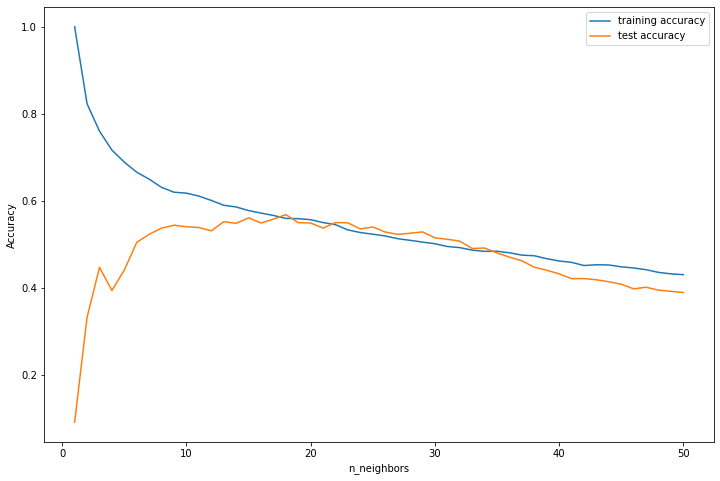

In [2053]:
# creating lists for training set accuracy and test set accuracy KNN model
training_accuracy = []
test_accuracy     = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [2054]:
# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

The optimal number of neighbors is 18


In [2056]:
# Table and Final Result


# comparing results

print(f"""
Model           Train Score      Test Score      Train-Test Gap
-----           -----------      ----------      --------------
OLS             {lr_train_score}           {lr_test_score}            {lr_test_gap}
Lasso(Selected) {model_lasso_fit_train_score}           {model_lasso_fit_test_score}              {model_lasso_test_gap}
KNN             {knn_reg_score_train}           {knn_reg_score_test}            {knn_reg_test_gap}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'KNN'],
           
    'Training' : [lr_train_score, model_lasso_fit_train_score,
                                   knn_reg_score_train],
           
    'Testing'  : [lr_test_score, model_lasso_fit_test_score,
                                   knn_reg_score_test],
                    
    'Train-Test Gap' : [lr_test_gap, model_lasso_test_gap,
                                        knn_reg_test_gap],
                    }


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)





Model           Train Score      Test Score      Train-Test Gap
-----           -----------      ----------      --------------
OLS             0.7187           0.7238            0.0051
Lasso(Selected) 0.7036           0.7519              0.0483
KNN             0.5601           0.5689            0.0088



<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><br><br><br><br>
<h1>Final Result</h1>
<em>Lasso model was selected. This model has a Test score of 75.19% with a train test gap of 0.0483 which is lower than 0.05</em><br><br>
<em>One of the lack in this model is the amount of data, 196 observations its not enough to assure a good amount of data in each group (Train and Test).

<em>Felipe Dominguez<em><br>
Hult International Business School <br><br><br>